In [1]:
import numpy as np
import pandas as pd
import csv

df0 = pd.read_csv('Data Preprocessing/complete2.csv')
print(df0.head())

   hour  east_side  west_side  temperature  humidity  pressure  \
0   0.0        2.0        5.0         7.42      87.0    1003.0   
1   1.0        1.0        0.0         7.78      87.0    1003.0   
2   2.0        1.0        0.0         8.13      87.0    1003.0   
3   3.0        1.0        0.0         8.24      64.0    1025.0   
4   4.0        2.0        6.0         8.66      68.0    1019.0   

   wind_direction  wind_speed  work_status day_of_week season  
0             0.0         0.0          1.0         Fri   Fall  
1             0.0         1.0          1.0         Fri   Fall  
2           160.0         2.0          1.0         Fri   Fall  
3           270.0        10.0          1.0         Fri   Fall  
4           309.0         5.0          1.0         Fri   Fall  


In [2]:
df0['hour'] = df0['hour'].astype(str)

In [3]:
cat_columns = ['hour', 'day_of_week','season']
num_cloumns = ['temperature','humidity','pressure','wind_direction','wind_speed','work_status']
target_east = ['east_side']
target_west = ['west_side']

dummy_df = pd.get_dummies(df0[cat_columns])

df = pd.concat([df0[num_cloumns],dummy_df],axis = 1).fillna(0)
df.columns

Index(['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed',
       'work_status', 'hour_0.0', 'hour_1.0', 'hour_10.0', 'hour_11.0',
       'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0',
       'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_2.0', 'hour_20.0',
       'hour_21.0', 'hour_22.0', 'hour_23.0', 'hour_3.0', 'hour_4.0',
       'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, df0[target_east], test_size=0.33, random_state=42)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #avoid the 'a = 0' situation
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

def printMetrics(algorithm):
    print("RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, algorithm)))
    print("MAPE: %.2f"
          % mean_absolute_percentage_error(y_test, algorithm)+'%')
    print("R2: %.2f"
          % r2_score(y_test, algorithm))
    print("MAE: %.2f"
          % mean_absolute_error(y_test, algorithm))

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

series = pd.read_csv('Data Preprocessing/bike_flow.csv',names = ['east','west'], header=0, index_col=0, squeeze=True)
print(series.head())
series = series['west']
plt.figure(figsize=(15,7))
series.plot()
plt.show()

                        east  west
10/03/2012 12:00:00 AM   9.0   4.0
10/03/2012 01:00:00 AM   6.0   4.0
10/03/2012 02:00:00 AM   1.0   1.0
10/03/2012 03:00:00 AM   3.0   2.0
10/03/2012 04:00:00 AM   1.0   6.0


<Figure size 1500x700 with 1 Axes>

In [7]:
series = series.astype('float64').fillna(0)
pd.Series.autocorr(series,lag=7)

-0.08838884743144607

In [8]:
#https://github.com/pramodnagare/AdvancedDataScience/blob/master/Assignment%202/TimeSeries_ARIMA%20Model.ipynb

arima = ARIMA(series, order=(3,1,0))
arima_fit = arima.fit(disp=0)
print(arima_fit.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as 

                             ARIMA Model Results                              
Dep. Variable:                 D.west   No. Observations:                53999
Model:                 ARIMA(3, 1, 0)   Log Likelihood             -278223.287
Method:                       css-mle   S.D. of innovations             41.823
Date:                Fri, 14 Dec 2018   AIC                         556456.575
Time:                        07:07:05   BIC                         556501.059
Sample:                    10-03-2012   HQIC                        556470.460
                         - 11-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.337e-05      0.183      0.001      1.000      -0.359       0.360
ar.L1.D.west     0.4608      0.004    107.203      0.000       0.452       0.469
ar.L2.D.west    -0.3930      0.004    -88.89

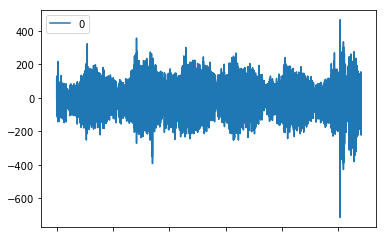

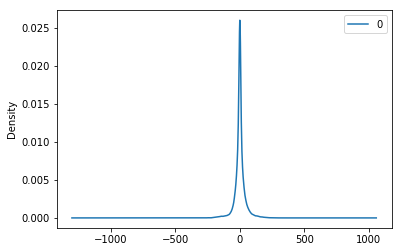

                  0
count  53999.000000
mean       0.000071
std       41.822920
min     -713.234996
25%      -12.641256
50%       -0.645011
75%       11.406590
max      467.240852


In [9]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [10]:
#Rolling Forecast ARIMA Model
X = series.sample(1000).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [11]:
print("RMSE: %.2f"
  % sqrt(mean_squared_error(test[:1000], predictions[:1000])))
print("MAPE: %.2f"
      % mean_absolute_percentage_error(test[:1000], predictions[:1000])+'%')
print("R2: %.2f"
      % r2_score(test[:1000], predictions[:1000]))
print("MAE: %.2f"
      % mean_absolute_error(test[:1000], predictions[:1000]))

RMSE: 81.60
MAPE: 845.38%
R2: -0.18
MAE: 53.69


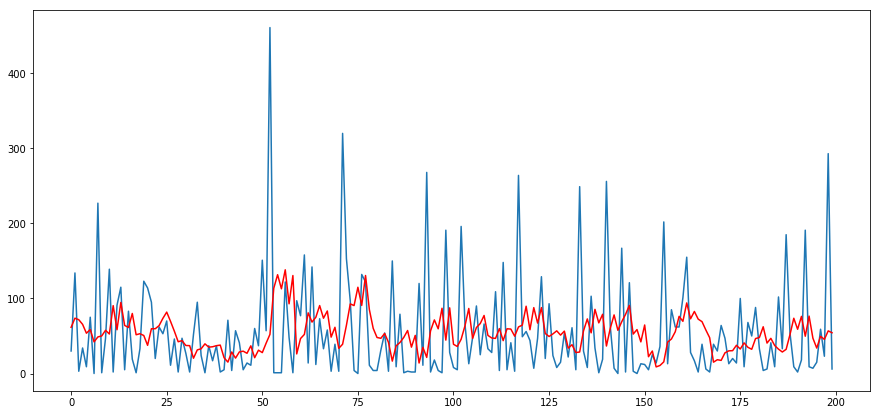

In [12]:
plt.figure(figsize=(15,7))
plt.plot(test[:200])
plt.plot(predictions[:200], color='red')
plt.show()

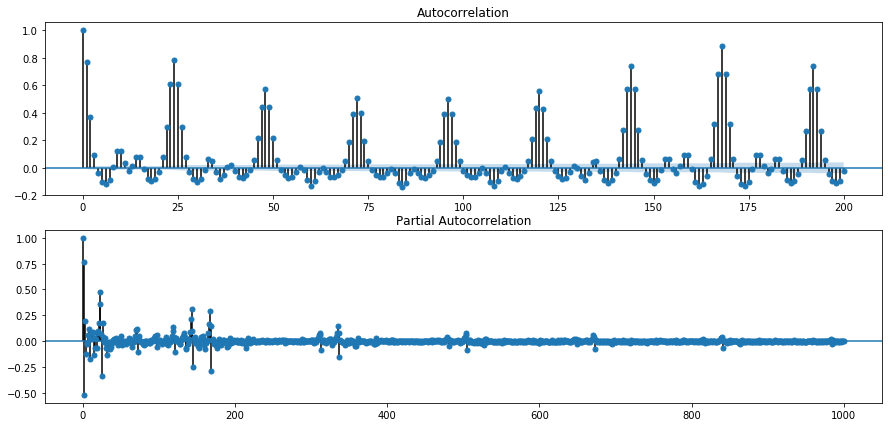

In [13]:
import statsmodels.api as sm

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=1000, ax=ax2)
plt.show()

In [15]:
# grid search sarima hyperparameters for monthly mean temp dataset
#https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv

In [ ]:
#Grid Search
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[12]):
    models = list()
    # define config lists
    p_params = [0, 1]
    d_params = [0, 1]
    q_params = [0, 1]
    t_params = ['n']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

if __name__ == '__main__':
    # load dataset
    data = series.values
    # data split
    n_test = 12
    # model configs
    cfg_list = sarima_configs(seasonal=[12])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

In [16]:
#Rolling Forecast SARIMA Model
Xs = series.sample(1000).values
size = int(len(X) * 0.66)
trains, tests = Xs[0:size], Xs[size:len(X)]
historys = [x for x in trains]
predictionss = []
for t in range(len(tests)):
    models = SARIMAX(historys, trend='t', order=(0,1,0), seasonal_order=(2,0,0,12))
    models_fit = models.fit()
    outputs = models_fit.forecast()
    yhats = outputs[0]
    predictionss.append(yhats)
    obss = tests[t]
    historys.append(obss)
    print(yhats,obss)
error = mean_squared_error(tests, predictionss)
print('Test MSE: %.3f' % error)

1.4664321841984829 2.0
0.3354100835430316 2.0
9.124671746944736 99.0
90.32041545182894 40.0
40.22929891104179 30.0
29.601099153772374 69.0
88.3425401535789 2.0
-15.544362538123089 37.0
43.076749943070425 5.0
-0.0267936714599859 125.0
127.43806347082236 30.0
26.919902161927833 203.0
202.48957710928855 29.0
29.359039616579075 32.0
40.60114601776372 12.0
3.928825476454513 12.0
11.260399435331893 123.0
124.66216946255317 18.0
21.36806827285698 66.0
61.43607824846449 6.0
8.377432139080184 25.0
25.416041790022497 1.0
-0.9457910368297682 0.0
4.183632237744442 4.0
-2.91920267880273 11.0
10.921663002145124 2.0
4.146010771844875 17.0
14.907130067282042 2.0
5.596182571132055 0.0
-2.9138153236135125 14.0
13.410131975418626 67.0
65.92764184005186 58.0
57.69658465197658 7.0
9.77862977216115 20.0
16.71246055291293 25.0
30.628885602916633 5.0
-0.5218747199625433 81.0
80.8683679793385 6.0
5.755217930451727 2.0
1.2133385572479383 84.0
87.40147365292447 6.0
3.25111534373448 6.0
9.178817324253506 174.0
17

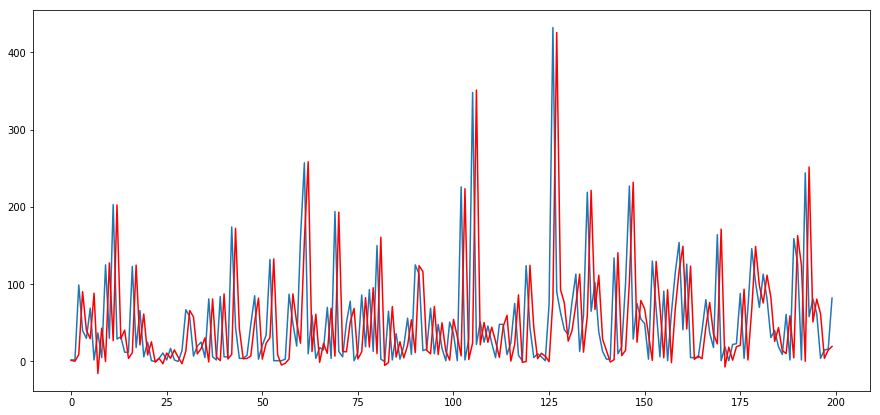

In [17]:
plt.figure(figsize=(15,7))
plt.plot(tests[:200])
plt.plot(predictionss[:200], color='red')
plt.show()

In [18]:
print("RMSE: %.2f"
  % sqrt(mean_squared_error(test[:1000], predictions[:1000])))
print("MAPE: %.2f"
      % mean_absolute_percentage_error(test[:1000], predictions[:1000])+'%')
print("R2: %.2f"
      % r2_score(test[:1000], predictions[:1000]))
print("MAE: %.2f"
      % mean_absolute_error(test[:1000], predictions[:1000]))

RMSE: 81.60
MAPE: 845.38%
R2: -0.18
MAE: 53.69


In [18]:
#!pip install xgboost

In [ ]:
from tpot import TPOTRegressor

pipeline_optimizer = TPOTRegressor(generations=20, population_size=20, cv=3,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# Average CV score on the training set was:-659.3627611178482
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.25, min_samples_leaf=1, min_samples_split=9, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.7000000000000001, tol=0.001)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
printMetrics(results)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/tpot/builtins/stacking_estimator.py:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

RMSE: 23.95
MAPE: 60.42%
R2: 0.92
MAE: 13.28


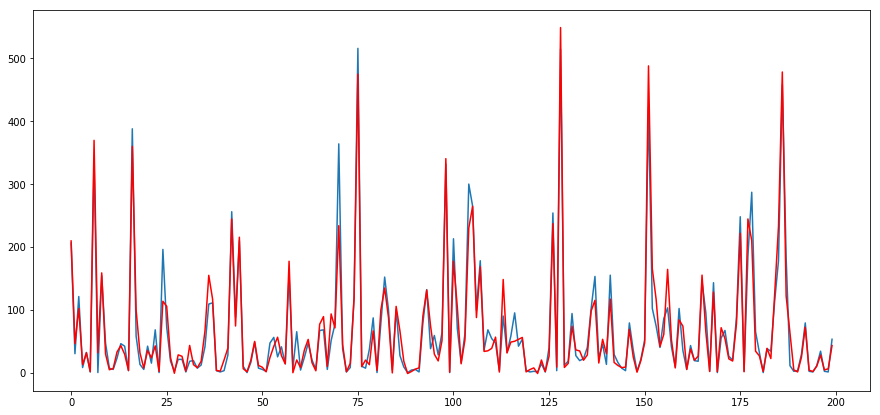

In [20]:
plt.figure(figsize=(15,7))
plt.plot(y_test.head(200).values)
plt.plot(results[:200], color='red')
plt.show()

In [20]:
#!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [65]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,14 hours 13 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,22 days
H2O cluster name:,osamuyanagano
H2O cluster total nodes:,1
H2O cluster free memory:,3.429 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [66]:
h2o_train_df = pd.concat([y_train,X_train],axis = 1)

h2o_train = h2o.H2OFrame(h2o_train_df)
h2o_train.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:29362
Cols:42




,east_side,temperature,humidity,pressure,wind_direction,wind_speed,work_status,hour_0.0,hour_1.0,hour_10.0,hour_11.0,hour_12.0,hour_13.0,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_2.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0,hour_8.0,hour_9.0,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,season_Fall,season_Spring,season_Summer,season_Winter
type,real,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,-9.370000000000005,13.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,56.52445970202171,11.312483588874592,77.14883132761895,1021.1493331797469,162.42926231183162,2.124787139840617,0.6858524623663238,0.04192493699339282,0.04107349635583407,0.04161841836387167,0.04298072338396567,0.04151624548736462,0.04229957087391867,0.041311899734350524,0.04219739799741162,0.04107349635583407,0.04148218786186227,0.04216334037190927,0.04267420475444452,0.04103943873033172,0.04206116749540222,0.04127784210884817,0.04161841836387167,0.04120972685784347,0.04168653361487637,0.04100538110482937,0.041311899734350524,0.04240174375042572,0.041754648865881074,0.04107349635583407,0.04124378448334582,0.14144131871125945,0.1443362168789592,0.1417478373407806,0.1442681016279545,0.1405898780737007,0.1433826033648934,0.14423404400245216,0.16814249710510185,0.16582657857094205,0.25253729309992506,0.41349363122403104
maxs,717.0,34.0,100.0,1058.0,360.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,81.77695005816022,6.58604685612873,18.175735529649298,9.73391082007468,102.85731631120522,1.6085622446126326,0.4641833694775581,0.20042106850026684,0.19846361305810575,0.19971901285698498,0.20281711405684877,0.199484340581459,0.20127517708352122,0.1990140085034419,0.20104266747637695,0.19846361305810575,0.19940604348311783,0.20096509295109694,0.20212498215353736,0.19838483709561502,0.20073215482773213,0.19893549130671298,0.199719012856985,0.19877834636435018,0.19987527895295343,0.19830602399046574,0.1990140085034419,0.20150736660153173,0.20003139977709114,0.19846361305810575,0.19885693727490572,0.3484821487881153,0.3514363096601164,0.34879726401557526,0.3513673593288507,0.34760391164085547,0.35046856585800806,0.351332874136409,0.3739991465164658,0.3719312244196635,0.43447512898353247,0.49246817966614576
zeros,1190,4,0,0,2022,2871,9224,28131,28156,28140,28100,28143,28120,28149,28123,28156,28144,28124,28109,28157,28127,28150,28140,28152,28138,28158,28149,28117,28136,28156,28151,25209,25124,25200,25126,25234,25152,25127,24425,24493,21947,17221
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2.0,4.163499999999999,100.0,1037.0,75.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.0,4.010000000000049,75.0,1017.0,85.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,19.0,7.8735000000000355,99.0,1026.0,187.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x= list(X_train.columns), y = 'east_side', training_frame= h2o_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [40]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_AutoML_20181214_044937,610.798416,24.714336,610.798416,13.572719,NaN
1,StackedEnsemble_BestOfFamily_AutoML_20181214_0...,622.599897,24.951952,622.599897,13.617491,NaN
2,XGBoost_2_AutoML_20181214_044937,624.291777,24.985832,624.291777,13.739135,NaN
3,XGBoost_1_AutoML_20181214_044937,629.165614,25.083174,629.165614,14.229641,NaN
4,XRT_1_AutoML_20181214_044937,669.727878,25.879101,669.727878,14.255596,0.605287
5,DRF_1_AutoML_20181214_044937,670.066152,25.885636,670.066152,14.211585,0.605867
6,GLM_grid_1_AutoML_20181214_044937_model_1,2411.222196,49.104197,2411.222196,30.884585,NaN


In [64]:
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
mod_best

NameError: name 'aml_leaderboard_df' is not defined

In [50]:
h2o_test = h2o_train = h2o.H2OFrame(pd.concat([X_test,y_test],axis = 1))
mod_perf = mod_best.model_performance(h2o_test)
mod_perf

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 556.4726898428597
RMSE: 23.58967337295834
MAE: 13.245630663362125
RMSLE: NaN
R^2: 0.9176283864779679
Mean Residual Deviance: 556.4726898428597
Null degrees of freedom: 14462
Residual degrees of freedom: 14458
Null deviance: 97708000.64112057
Residual deviance: 8048264.51319728
AIC: 132485.77851448505


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed', 'work_status', 'hour_0.0', 'hour_1.0', 'hour_10.0', 'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_2.0', 'hour_20.0', 'hour_21.0', 'hour_22.0', 'hour_23.0', 'hour_3.0', 'hour_4.0', 'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0', 'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']
Optimal number of features : 41


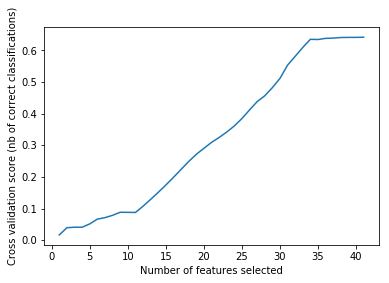

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
import warnings

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Create the RFE object and compute a cross-validated score.
lr = LinearRegression()
rfecv = RFECV(estimator=lr, step=1, scoring='r2')

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)

X_train.columns[rfecv.get_support(indices=True)]

# 1st way to get the list
vector_names = list(X_train.columns[rfecv.get_support(indices=True)])
print(vector_names)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [52]:
from sklearn.metrics import r2_score
lr.fit(X_train,y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = lr.predict(X_test)

# View The Accuracy Of Our Full Feature (42 Features) Model
r2_score(y_test, y_pred)

0.6557456238927811

In [54]:
!conda install -c conda-forge Skater --yes

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - skater


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.11.29         |        py36_1000         145 KB  conda-forge
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         288 KB

The following packages will be UPDATED:

    ca-certificates: 2018.10.15-ha4d7672_0 conda-forge --> 2018.11.29-ha4d7672_0 conda-forge
    certifi:         2018.10.15-py36_1000  conda-forge --> 2018.11.29-py36_1000  conda-forge


certifi-2018.11.29   | 145 KB    | ##################################### | 100% 
ca-certificates-2018 | 143 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: don

In [37]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
interpreter = Interpretation(X_test, feature_names=X_test.columns.values)
pyint_model = InMemoryModel(exported_pipeline.predict, examples=X_test)

In [61]:
def understanding_interaction():
    # ['worst area', 'mean perimeter'] --> list(feature_selection.value)
    interpreter.partial_dependence.plot_partial_dependence(list(feature_selection.value),
                                                                mod_best, 
                                                                grid_resolution=grid_resolution.value, 
                                                                with_variance=True)
    axes_list = interpreter.partial_dependence.plot_partial_dependence([feature_selection.value],
                                                                       mod_best, 
                                                                       grid_resolution=grid_resolution.value, 
                                                                       with_variance=True)

In [62]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
from IPython.display import clear_output
grid_resolution = widgets.IntSlider(description="GR", 
                                    value=10, min=10, max=100)
display(grid_resolution)

# dropdown to select relevant features from the dataset
feature_selection = widgets.SelectMultiple(
    options=tuple(X_train.columns.values),
    description='Features',
    layout=widgets.Layout(display="flex", flex_flow='column', align_items = 'stretch'),
    disabled=False,
    multiple=True
)
display(feature_selection)

IntSlider(value=10, description='GR', min=10)

SelectMultiple(description='Features', layout=Layout(align_items='stretch', display='flex', flex_flow='column'…

In [63]:
button = widgets.Button(description="Generate Interactions")
display(button)

def on_button_clicked(button_func_ref):
    clear_output()
    understanding_interaction()

button.on_click(on_button_clicked)

NameError: name 'mod_best' is not defined

In [27]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from IPython.display import display, HTML, clear_output

def on_value_change(change):
    index = 33
    exp = LimeTabularExplainer(X_test, 
                           feature_names=X_train.columns.values, 
                           class_names=['east_side'])
    print("Model behavior at row: {}".format(index))
    # Lets evaluate the prediction from the model and actual target label
    print("prediction from the model:{}".format(eclf.predict(X_test[index].reshape(1, -1))))
    print("Target Label on the row: {}".format(y_test.reshape(1,-1)[0][index]))
    clear_output()
    display(HTML(exp.explain_instance(X_test[index], models['ensemble'].predict_proba).as_html()))

In [ ]:
int_range = widgets.IntSlider(description="Index Selector", value=9, min=0, max=100)
display(int_range)
int_range.observe(on_value_change, names='value')